https://pulser.readthedocs.io/en/stable/tutorials/creating.html#Adiabatic-preparation-of-an-Anti-Ferromagnetic-State

In [1]:
import numpy as np
import pulser
from matplotlib import pyplot as plt

In [36]:
# Parameters in rad/µs
U = 2 * np.pi
Omega_max = 2.0 * U
delta_0 = -6 * U
delta_f = 2 * U

# Parameters in ns
t_rise = 252
t_fall = 500
t_sweep = (delta_f - delta_0) / (2 * np.pi * 10) * 1000

In [ ]:
device = pulser.AnalogDevice
print(device.specs)

A realistic device for analog sequence execution.

Register parameters:
 - Dimensions: 2D
 - Maximum number of atoms: 80
 - Maximum distance from origin: 38 µm
 - Minimum distance between neighbouring atoms: 5 μm

Layout parameters:
 - Requires layout: Yes
 - Accepts new layout: Yes
 - Minimal number of traps: 1
 - Maximum layout filling fraction: 0.5

Device parameters:
 - Rydberg level: 60
 - Ising interaction coefficient: 865723.02
 - Channels can be reused: No
 - Supported bases: ground-rydberg
 - Supported states: r, g
 - SLM Mask: No
 - Maximum sequence duration: 6000 ns
 - Maximum number of runs: 2000

Channels:
 - 'rydberg_global': Rydberg(addressing='Global', max_abs_detuning=125.66370614359172, max_amp=12.566370614359172, min_retarget_interval=None, fixed_retarget_t=None, max_targets=None, clock_period=4, min_duration=16, max_duration=100000000, min_avg_amp=0, mod_bandwidth=8, custom_phase_jump_time=None, eom_config=RydbergEOM(limiting_beam=<RydbergBeam.RED: 2>, max_limiting_

Interatomic Radius is: 7.186760677748386µm.


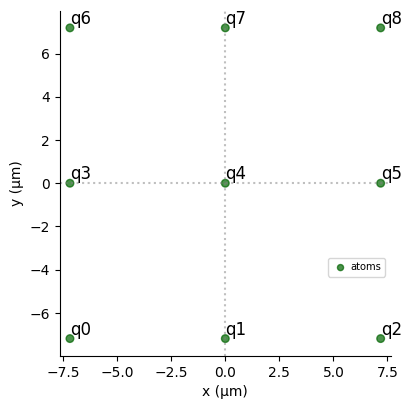

In [5]:
R_interatomic = (device.interaction_coeff / U) ** (1 / 6)
N_side = 3
register = pulser.Register.square(N_side, R_interatomic, prefix="q")
print(f"Interatomic Radius is: {R_interatomic}µm.")
register.draw()

Currently we are in the state $|000000000\rangle$

In [ ]:
device.interaction_coeff # C6/hbar in Hz µm^6 I think

865723.02

In [24]:
sequence = pulser.Sequence(register, device)

In [25]:
sequence.declare_channel("rydberg_global", "rydberg_global")
print(
    "The states used in the computation are", sequence.get_addressed_states()
)

The states used in the computation are ['r', 'g']


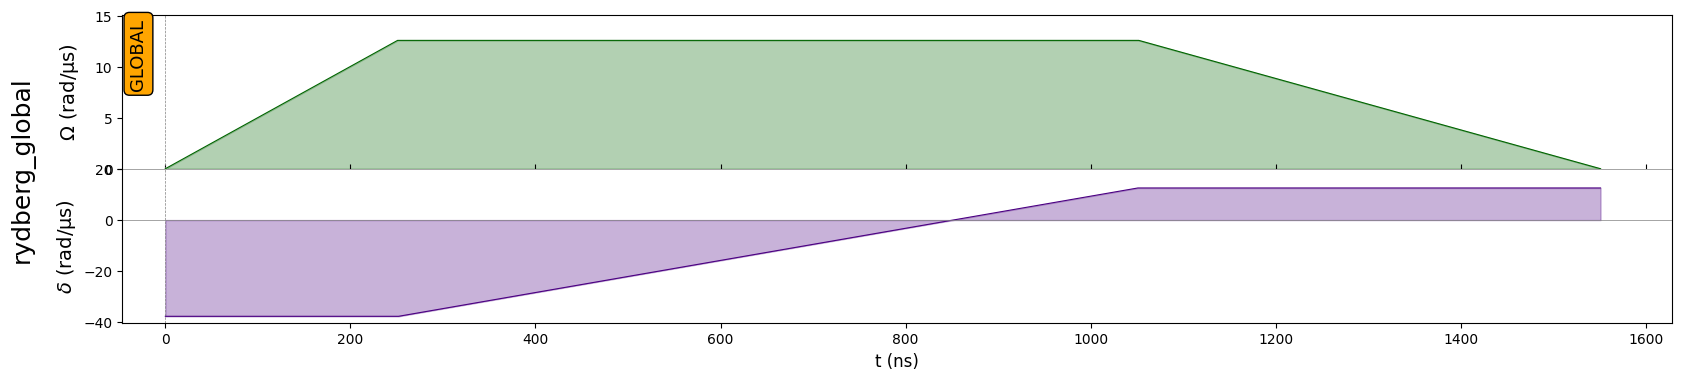

In [26]:
rise = pulser.Pulse.ConstantDetuning(
    pulser.RampWaveform(t_rise, 0.0, Omega_max), delta_0, 0.0
)
sweep = pulser.Pulse.ConstantAmplitude(
    Omega_max, pulser.RampWaveform(t_sweep, delta_0, delta_f), 0.0
)
fall = pulser.Pulse.ConstantDetuning(
    pulser.RampWaveform(t_fall, Omega_max, 0.0), delta_f, 0.0
)
sequence.add(rise, "rydberg_global")
sequence.add(sweep, "rydberg_global")
sequence.add(fall, "rydberg_global")
sequence.draw(mode="input")

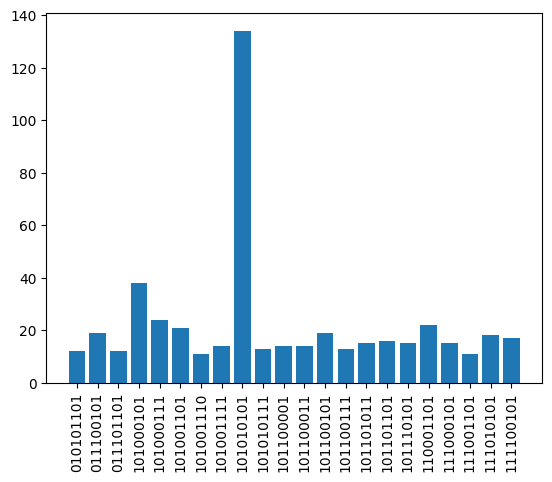

In [27]:
backend = pulser.backends.QutipBackend(sequence)
result = backend.run()
counts = result.sample_final_state(1000)
# Let's plot the histogram associated to the measurements
# Let's select only the states that are measured more than 10 times
most_freq = {k: v for k, v in counts.items() if v > 10}
plt.bar(list(most_freq.keys()), list(most_freq.values()))
plt.xticks(rotation="vertical")
plt.show()

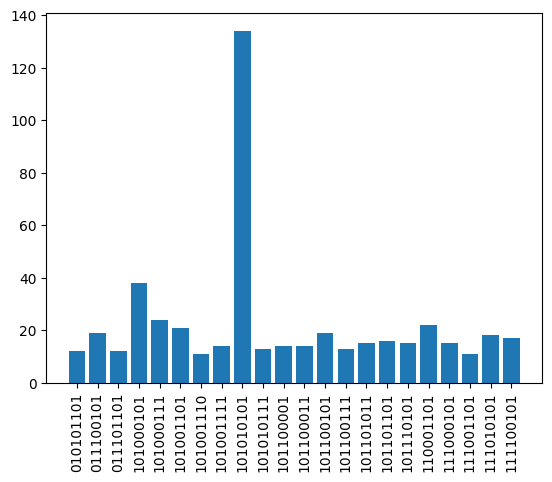

In [ ]:
backend = pulser.backends.QutipBackend(sequence)
result = backend.run()
counts = result.sample_final_state(1000)
# Let's plot the histogram associated to the measurements
# Let's select only the states that are measured more than 10 times
most_freq = {k: v for k, v in counts.items() if v > 10}
plt.bar(list(most_freq.keys()), list(most_freq.values()))
plt.xticks(rotation="vertical")
plt.show()